In [3]:
!pip install python-Levenshtein

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re
from Levenshtein import distance as levenshtein_distance
import scipy.stats as stats
import pandas as pd
from scipy.stats import f_oneway


# The fractal-like structure of Poetry

# Preface

## Introduction

### What is a Fractal?
Fractals are complex geometric shapes that can be divided into parts, each of which is a smaller copy of the whole. This property is known as self-similarity. However, not all fractals exhibit perfect self-similarity. Benoit Mandelbrot, the pioneer of fractal geometry, introduced fractals to describe the irregular and complex shapes found in nature, such as coastlines and mountain ranges. Fractal geometry contrasts with traditional calculus, which assumes that zooming in on a shape will eventually reveal smoothness. For example, the Coastline Paradox shows that the length of a coastline increases indefinitely as one measures it in finer detail, revealing its fractal-like properties.

But no object in nature has infinite detail, so at some small scale even self-similar objects cease to be self-similar. However, over a fairly wide range of scales, they maintain this self-similarity. Fractals have exact self-similarity, meaning the object contains small pieces that exactly reproduce the whole object when magnified. Fractal-like objects, on the other hand, have a form of self-similarity where pieces look similar to the whole when appropriately magnified. For instance, a cauliflower is self-similar because small pieces resemble the whole, even though no two pieces are identical. This differs from a true fractal like the Sierpinski triangle, where every small piece is an exact smaller version of the whole triangle. <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)

### What is a Poem?
A poem is a form of literary expression that uses rhythmic and aesthetic qualities of language to evoke meanings and emotions. Poems often rely on meter, rhyme, and other structural elements to create a flow and rhythm that enhances the impact of the words. Unlike prose, poems are often more concise and use literary devices like metaphors and similes to convey deeper meanings in fewer words.
<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

### Hypothetical Argument
One could hypothetically argue, outside the realm of mathematics, that human written and oral speech is a fractal. From a young age, children learn that we read novels and poems, which are texts comprised of sentences connected by meaning. Sentences are formed by linking words by meaning, and words are constructed from syllables and phonems which are the constructed by letters. This hierarchical structure exhibits a form of self-similarity, where each level of language builds upon the previous one in a fractal-like manner. 
As pointed out in Andres (2010), by fractals in poetry, one usually means semantic recursions.Recursion is a mathematical phenomenon applied to linguistics, where a grammatical structure is repeated within itself again and again.<a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3)

### Objective
- **Objective**: To explore the hypothesis that poems exhibit fractal-like structure using mathematical methods, observations and statistics.
- **Relevance**: Understanding the fractal nature of poems can provide insights into the inherent complexity and self-similarity in literary structures and written speech.
- **Overview**: This document will analyze poems using Discrete Fourier Transform, Recurence plot, Higuchi's Fractal Dimension, and Box-Counting Fractal Dimension and ANOVA. Two key literary aspects of poems will be used: rhyme patterns and syllable count. Poems that are used for the experiments are available free online.


## Literary Aspects

### Syllable count

Syllable counts provide insight into the rhythmic structure of a poem. By analyzing the number of syllables in each word, we can identify patterns and variations in the poem’s meter and flow. This quantitative approach allows us to capture the rhythmic nuances that contribute to the poem’s overall structure.<a name="cite_ref-4"></a>[<sup>[4]</sup>](#cite_note-4) <a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5)

In [27]:
# Function to count syllables in a word
def count_syllables(word):
    """
    Count the number of syllables in a word.
    
    Parameters:
    word (str): The word to count syllables in.
    
    Returns:
    int: The number of syllables.
    """
    word = word.lower()
    vowels = "аъоуеи"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if count == 0:
        count += 1
    return count

# Example poem
poem = """
Душата ми е пуста: буря кратка
помете всичко там. Напразно вече
следа бих дирил от мечтата сладка
по тебе, образ потъмнял! Далече,
цял век далече са от мен
миражите на вчерашния ден.
"""

# Preprocess the poem: Convert each word to its syllable count
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = [count_syllables(word) for word in words]

# Display the syllable counts
print("Syllable counts per word:", syllable_sequence)

Syllable counts per word: [3, 1, 1, 2, 1, 2, 3, 2, 1, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 4, 1, 3, 1]


### Rhyme Patterns

Rhyme patterns are another essential component of poetic structure. By examining the similarity between the endings of lines, we can uncover the rhyme scheme of the poem. This analysis reveals the phonetic connections between lines, contributing to the poem’s aesthetic and structural coherence. To accurately capture these patterns, the Levenshtein distance will be used to measure the similarity between line endings. <a name="cite_ref-6"></a>[<sup>[6]</sup>](#cite_note-6)

In [28]:
# Function to encode the rhyme pattern using Levenshtein distance
def encode_rhyme_pattern(poem, threshold=2):
    """
    Encode the rhyme pattern of a poem using Levenshtein distance.
    
    Parameters:
    poem (str): The poem to encode.
    threshold (int): The maximum allowed distance to consider words as rhyming.
    
    Returns:
    list: The encoded rhyme pattern.
    """
    lines = poem.strip().split('\n')
    endings = []
    for line in lines:
        words = re.findall(r'\b\w+\b', line)
        if words:
            endings.append(words[-1][-3:])  # Get the last 3 characters of the last word
        else:
            endings.append('')  # Handle empty lines or lines without words
    
    rhyme_dict = {}
    rhyme_pattern = []
    rhyme_code = 1
    
    for i, ending in enumerate(endings):
        if ending in rhyme_dict:
            rhyme_pattern.append(rhyme_dict[ending])
        else:
            rhyme_group_found = False
            for key in rhyme_dict:
                if levenshtein_distance(ending, key) <= threshold:
                    rhyme_pattern.append(rhyme_dict[key])
                    rhyme_group_found = True
                    break
            if not rhyme_group_found:
                rhyme_dict[ending] = rhyme_code
                rhyme_pattern.append(rhyme_code)
                rhyme_code += 1

    return rhyme_pattern


# Example poem
poem = """
Душата ми е пуста: буря кратка
помете всичко там. Напразно вече
следа бих дирил от мечтата сладка
по тебе, образ потъмнял! Далече,
цял век далече са от мен
миражите на вчерашния ден.
"""

# Encode the rhyme pattern
rhyme_pattern = encode_rhyme_pattern(poem)

# Display the rhyme pattern
print("Rhyme pattern encoding:", rhyme_pattern)

Rhyme pattern encoding: [1, 2, 1, 2, 3, 3]


## Methods

### Discrete Fourier Transform

#### Explanation and Purpose
The Discrete Fourier Transform (DFT) decomposes a signal into its constituent frequencies. It converts a time-domain signal into a frequency-domain representation. For text analysis, this means converting the sequence of characters into a numerical sequence and analyzing the frequency components of this sequence.
The result has both mathematically real and mathematically imaginary components. 

#### Why Discrete Fourier Transform? ####
- **Identify Repeating Patterns**: Poems often have rhythmic and phonetic patterns. The DFT can identify these repeating patterns by highlighting dominant frequencies. This allows us to see the underlying structure of the poem that may not be immediately obvious in the time-domain representation
- **Analyze Periodicity**: Just like periodic patterns in natural phenomena (e.g., climate cycles), poems can exhibit periodic structures such as recurring themes, meter, and rhyme schemes. The DFT helps in detecting these periodic components by breaking down the text into frequency components, making it easier to identify and analyze these cycles <a name="cite_ref-7"></a>[<sup>[7]</sup>](#cite_note-7)

 

#### Mathematical Formula

The **Discrete Fourier Transform (DFT)** of a sequence $x[n]$ is given by:

$$
\hat{x}(f) = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi \frac{fn}{N}}
$$

where:

1. **$ X[k] $**:
   - **Definition**: The k-th component of the DFT, representing the amplitude and phase of the frequency component at index $ k $.
   - **Interpretation**: It is a complex number that gives information about the magnitude (amplitude) and the shift (phase) of the frequency $ k $ in the original sequence. In the context of analyzing poems, $ X[k] $ tells us how strong a particular rhythmic pattern (frequency) is in the syllable counts of the poem.

2. **$\sum$**:
   - **Definition**: Summation symbol.
   - **Interpretation**: It indicates that you sum the values that follow, over a specified range (in this case, from $ n = 0 $ to $ n = N-1 $). This operation aggregates the contributions of each syllable position in the poem to the frequency component $ k $.

3. **$ n $**:
   - **Definition**: The index of the input sequence.
   - **Interpretation**: It runs from $ 0 $ to $ N-1 $, where $ N $ is the total number of elements in the input sequence $ x $. Here, $ n $ represents each syllable position in the poem.

4. **$ N $**:
   - **Definition**: The total number of elements in the input sequence.
   - **Interpretation**: It is the length of the sequence $ x $. For a poem, $ N $ is the total number of syllables in the poem.

5. **$ x[n] $**:
   - **Definition**: The n-th element of the input sequence.
   - **Interpretation**: It represents the value of the sequence at index $ n $. In this context, $ x[n] $ is the syllable count at position $ n $ in the poem.

6. **$ e^{-j2\pi \frac{kn}{N}} $**:
   - **Definition**: The complex exponential function.
   - **Interpretation**: This is a rotating phasor (a complex exponential function), where:
     - $ e $ is the base of the natural logarithm.
     - $ j $ is the imaginary unit $ j = \sqrt{-1} $.
     - $ 2\pi $ is a constant to convert the frequency to radians.
     - $ k $ is the frequency index.
     - $ n $ is the current sample index.
     - $ N $ is the total number of elements in the sequence.
   - **Role**: This term rotates the input sequence $ x[n] $ in the complex plane, effectively transforming it into the frequency domain. For the poem, this means converting the syllable sequence into its frequency components to identify the underlying rhythmic patterns.



To compute $ X[k] $, you perform the following steps:

 **For each frequency index $ k $** (from $ 0 $ to $ N-1 $):
   - Multiply each element of the input sequence $ x[n] $ by the complex exponential $ e^{-j2\pi \frac{kn}{N}} $.
   - Sum these products over all values of $ n $ (from $ 0 $ to $ N-1 $).

#### Example Calculation

Let's compute the first two components $ X[0] $ and $ X[1] $ for a simple sequence $ x = [2, 1, 2, 1] $ with $ N = 4 $.

1. **$ X[0] $**:
$$
 X[0] = \sum_{n=0}^{3} x[n] \cdot e^{-j2\pi \frac{0 \cdot n}{4}} 
 $$
$$
 X[0] = 2 \cdot e^{-j2\pi \cdot 0} + 1 \cdot e^{-j2\pi \cdot 0} + 2 \cdot e^{-j2\pi \cdot 0} + 1 \cdot e^{-j2\pi \cdot 0}
 $$
$$
 X[0] = 2 + 1 + 2 + 1 
 $$
 $$
 X[0] = 6
$$
1. **$ X[1] $**:
$$
 X[1] = \sum_{n=0}^{3} x[n] \cdot e^{-j2\pi \frac{1 \cdot n}{4}} 
$$
 $$
 X[1] = 2 \cdot e^{-j\frac{2\pi \cdot 0}{4}} + 1 \cdot e^{-j\frac{2\pi \cdot 1}{4}} + 2 \cdot e^{-j\frac{2\pi \cdot 2}{4}} + 1 \cdot e^{-j\frac{2\pi \cdot 3}{4}} 
$$
 $$
 X[1] = 2 \cdot 1 + 1 \cdot e^{-j\frac{\pi}{2}} + 2 \cdot e^{-j\pi} + 1 \cdot e^{-j\frac{3\pi}{2}}
$$
 $$
 X[1] = 2 + 1 \cdot (-j) + 2 \cdot (-1) + 1 \cdot j
$$
 $$
 X[1] = 2 - j - 2 + j 
$$
 $$
 X[1] = 0 
$$
#### Implementation
<a name="cite_ref-8"></a>[<sup>[8]</sup>](#cite_note-8)

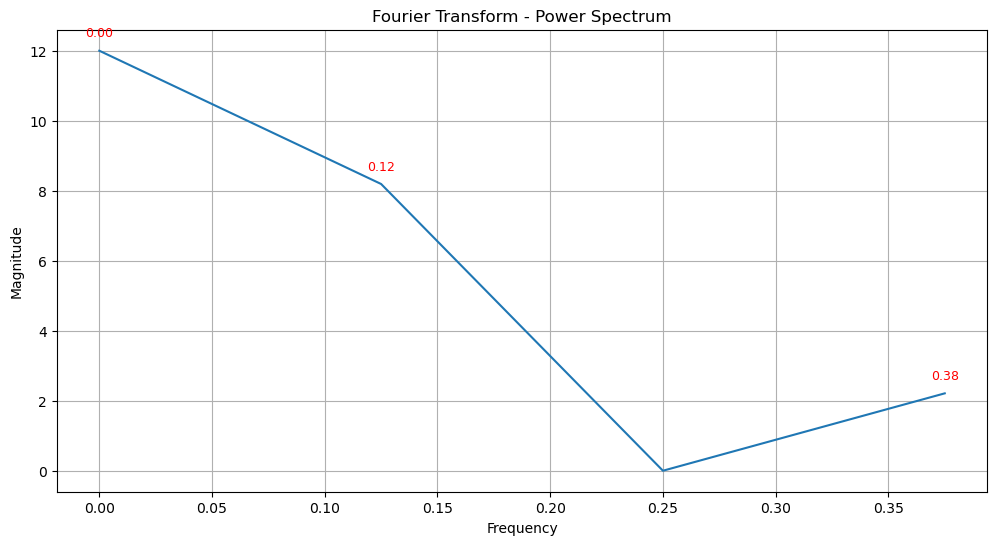

FFT Result: [12.        +0.j         -3.82842712-7.24264069j  0.        +0.j
  1.82842712-1.24264069j  0.        +0.j          1.82842712+1.24264069j
  0.        +0.j         -3.82842712+7.24264069j]


In [29]:
# Function to compute the Fast Fourier Transform (FFT)
def compute_fft(sequence):
    return np.fft.fft(sequence)

# Function to plot the Fourier Transform
def plot_fourier_transform(xf, yf, title='Fourier Transform - Power Spectrum', xlabel='Frequency', ylabel='Magnitude', threshold=0.1):
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    significant_peaks = np.where(yf > np.max(yf) * threshold)[0]
    for peak in significant_peaks:
        plt.annotate(f'{xf[peak]:.2f}', (xf[peak], yf[peak]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='red')
    
    plt.show()
    
    return xf[significant_peaks], yf[significant_peaks]

# Example sequence
sequence = np.array([1, 2, 3, 4, 2, 1, 0, -1])

# Compute the FFT
fft_result = compute_fft(sequence)

# Prepare data for plotting
N = len(sequence)
xf = np.fft.fftfreq(N)[:N//2]  # Frequency components
yf = np.abs(fft_result)[:N//2]  # Magnitude of the FFT result

# Plot the Fourier Transform
plot_fourier_transform(xf, yf)

# Print the FFT result for clarity
print("FFT Result:", fft_result)


### Recurrence Plot (RP)

#### Explanation and Purpose

A Recurrence Plot (RP) is a graphical tool used to visualize when a system’s state recurs over time. It highlights the times at which a dynamical system returns to a previously encountered state. RPs are especially useful for analyzing the periodicity and self-similarity in sequences, such as syllable counts or rhyme patterns in poetry, making it easier to detect patterns and potential fractal behavior.<a name="cite_ref-9"></a>[<sup>[9]</sup>](#cite_note-9)

#### Why Recurrence Plot?

- **Visualizing Repetitions:** RPs provide a clear visual representation of repeating patterns within a sequence, making it easier to identify periodic structures and self-similarity.
- **Analyzing Nonlinear Dynamics::** They are effective for studying the dynamics of nonlinear systems, where traditional linear methods may fall short.
- **Detecting Structural Patterns:** By examining the recurrence of states, RPs help in identifying structural patterns, such as the rhyme schemes or rhythmic patterns in a poem.


#### Mathematical Formula

Given a time series  x(i) , where  i  represents the time index, the recurrence plot is constructed as follows:
$$
 R_{i,j} = \Theta(\epsilon - ||x(i) - x(j)||) 
$$
where:
1. **$ R_{i,j} $**:<br>
   - **Definition**: The element of the recurrence matrix.<br>
   - **Interpretation**: $ R_{i,j} $ indicates whether the states at times $ i $ and $ j $ are considered recurrent. In the context of syllable counts, it shows whether the syllable count at position $ i $ is similar to the syllable count at position $ j $.

2. **$ \Theta(\cdot) $**:<br>
   - **Definition**: The Heaviside step function.<br>
   - **Interpretation**: This function is used to determine whether the distance between $ x(i) $ and $ x(j) $ is within the threshold $ \epsilon $. If $ \epsilon - ||x(i) - x(j)|| $ is greater than or equal to zero, $ \Theta(\cdot) $ returns 1 (indicating recurrence); otherwise, it returns 0.

3. **$ \epsilon $**:<br>
   - **Definition**: A threshold distance.<br>
   - **Interpretation**: This is a predefined value that determines whether two points in the time series are considered recurrent. In the context of syllable counts, it represents the maximum allowed difference between syllable counts for them to be considered similar.

4. **$ ||\cdot|| $**:<br>
   - **Definition**: Represents a norm (usually the Euclidean norm).<br>
   - **Interpretation**: This measures the distance between two points in the time series. For syllable counts, it is typically the absolute difference between the counts.

#### Example Calculation

To compute a simple example using the syllable count sequence $ x = [2, 1, 2, 1, 4] $ with $ \epsilon = 1 $ you pperform the following steps.

1. **Define the time series**:<br>
   - $ x = [2, 1, 2, 1, 4] $

2. **Calculate the recurrence matrix**:
$$
 R_{i,j} = \Theta(\epsilon - ||x(i) - x(j)||)
$$
- For $ \epsilon = 1 $, calculate the elements of the recurrence matrix $ R $:
$$
R = 
\begin{pmatrix}
1 & \Theta(1 - |2-1|) & \Theta(1 - |2-2|) & \Theta(1 - |2-1|) & \Theta(1 - |2-4|) \\
\Theta(1 - |1-2|) & 1 & \Theta(1 - |1-2|) & \Theta(1 - |1-1|) & \Theta(1 - |1-4|) \\
\Theta(1 - |2-2|) & \Theta(1 - |2-1|) & 1 & \Theta(1 - |2-1|) & \Theta(1 - |2-4|) \\
\Theta(1 - |1-2|) & \Theta(1 - |1-1|) & \Theta(1 - |1-2|) & 1 & \Theta(1 - |1-4|) \\
\Theta(1 - |4-2|) & \Theta(1 - |4-1|) & \Theta(1 - |4-2|) & \Theta(1 - |4-1|) & 1 \\
\end{pmatrix}
$$
 Evaluating the Heaviside Step Function $ \Theta $

The Heaviside step function $ \Theta $ is defined as:
$$
\Theta(x) = 
\begin{cases}
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0 \\
\end{cases}
$$
 Evaluate Each Element of the Matrix

1. $ R_{1,1} = \Theta(1 - |2-2|) = \Theta(1 - 0) = \Theta(1) = 1 $
2. $ R_{1,2} = \Theta(1 - |2-1|) = \Theta(1 - 1) = \Theta(0) = 1 $
3. $ R_{1,3} = \Theta(1 - |2-2|) = \Theta(1 - 0) = \Theta(1) = 1 $
4. $ R_{1,4} = \Theta(1 - |2-1|) = \Theta(1 - 1) = \Theta(0) = 1 $
5. $ R_{1,5} = \Theta(1 - |2-4|) = \Theta(1 - 2) = \Theta(-1) = 0 $

Repeat this process for all elements of the matrix:
$$
R = 
\begin{pmatrix}
1 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$
#### Implementation
<a name="cite_ref-10"></a>[<sup>[10]</sup>](#cite_note-10)

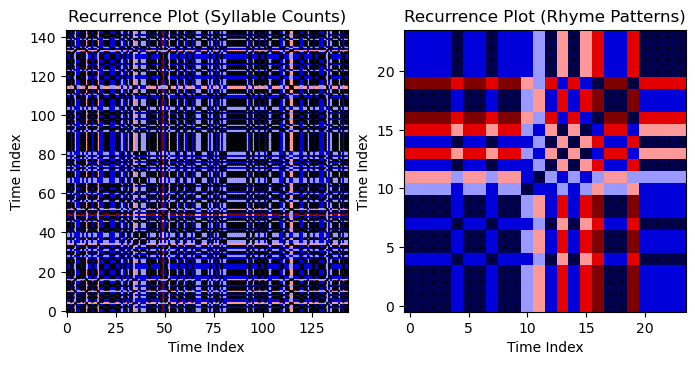

In [30]:


# Preprocess the poem: Convert each word to its syllable count
poem = """
Седя и гледам от прозореца: деца
играят вън; - сега е утрината тяхна
и пролет грее на безгрижните лица.
Един ли цвят пред моите очи увяхна?
Седя и гледам: спомени придавят гръд.
Неволно пита взор посоките далеки,
където се преплитат пътища, пътеки...
Що иде тук - и кой отива там, - отвъд
сребровъздушните стени на кръгозора?
Но кой ще назове честта и кой позора?
         Деца, боя се зарад вас.
 
Извършва слънцето заклетия си ход
над вашите глави открити. То прижуря -
и облачен дими припламнал небосвод.
Аз зная що е пек, аз зная що е буря.
Отдавна вече бдя - пребродих своя ден...
Деца, седя и гледам с горестна усмивка.
И кой ще ми натякне моята почивка?
Но на прозореца завесата пред мен
да падне чакам аз. От молниите блясък
ще свети вам по пладне. Бурята навън
ще заглушава вашия безсмислен крясък.
А без видения ще бъде моя сън.
"""
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = np.array([count_syllables(word) for word in words])

# Encode the rhyme pattern
rhyme_pattern = encode_rhyme_pattern(poem)

# Compute the recurrence matrix for syllable counts
N = len(syllable_sequence)
R_syllables = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        # Calculate the absolute difference between syllable counts
        R_syllables[i, j] = np.abs(syllable_sequence[i] - syllable_sequence[j])

# Compute the recurrence matrix for rhyme patterns
N_rhyme = len(rhyme_pattern)
R_rhyme = np.zeros((N_rhyme, N_rhyme))
for i in range(N_rhyme):
    for j in range(N_rhyme):
        # Calculate the absolute difference between rhyme patterns
        R_rhyme[i, j] = np.abs(rhyme_pattern[i] - rhyme_pattern[j])

# Define the threshold (epsilon)
epsilon = 0.1

# Apply the threshold to create binary recurrence matrices
binary_R_syllables = R_syllables <= epsilon
binary_R_rhyme = R_rhyme <= epsilon

# Ensure the main diagonal is set correctly (self-recurrence)
np.fill_diagonal(binary_R_syllables, 1)
np.fill_diagonal(binary_R_rhyme, 1)

# Plot the recurrence plots side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

# Recurrence plot for syllable counts
ax[0].imshow(R_syllables, origin='lower', cmap='seismic', interpolation='none')
ax[0].set_title('Recurrence Plot (Syllable Counts)')
ax[0].set_xlabel('Time Index')
ax[0].set_ylabel('Time Index')
# Highlight the recurrent points
ax[0].scatter(*np.where(binary_R_syllables), color='black', s=1)

# Recurrence plot for rhyme patterns
ax[1].imshow(R_rhyme, origin='lower', cmap='seismic', interpolation='none')
ax[1].set_title('Recurrence Plot (Rhyme Patterns)')
ax[1].set_xlabel('Time Index')
ax[1].set_ylabel('Time Index')
# Highlight the recurrent points
ax[1].scatter(*np.where(binary_R_rhyme), color='black', s=1)

plt.show()

### Higuchi's Fractal Dimension (HFD)

#### Explanation and Purpose
Higuchi’s Fractal Dimension (HFD) is a method used to calculate the fractal dimension of a time series. It provides a measure of the complexity and self-similarity of the sequence. Unlike traditional fractal dimension calculations that are often applied to geometric shapes, HFD is well-suited for irregular, one-dimensional data such as text.<a name="cite_ref-11"></a>[<sup>[11]</sup>](#cite_note-11)


**Why HFD?**
- **Quantifies Complexity:** HFD provides a numerical measure of the complexity of the poem, reflecting its structural intricacies.
- **Analyzes Self-Similarity:** By evaluating the fractal dimension, we can determine the degree of self-similarity in the text, a key characteristic of fractals.
- **Applicability to Text:** HFD can be effectively applied to sequences derived from text, such as syllable counts and rhyme patterns, making it ideal for analyzing poems.

#### Mathematical Formula


Given a time series $ x $, the Higuchi Fractal Dimension is calculated as follows:
$$
L_k(m) = \frac{1}{k} \sum_{i=1}^{\left\lfloor \frac{N-m}{k} \right\rfloor} \left| x[m + i \cdot k] - x[m + (i-1) \cdot k] \right|
$$
$$
L(k) = \frac{\sum_{m=1}^{k} L_k(m)}{k} 
$$
$$
 \text{HFD} = \frac{\log(L(k))}{\log(1/k)} 
$$

where:

**$ L_k(m) $**:<br>
- **Definition**: The length of the curve for a specific scale factor $ k $ starting at position $ m $.<br>
- **Interpretation**: This measures the "length" of the time series at different scales, capturing how the series changes at specific intervals. For syllable counts, it shows how the syllable count differences accumulate over different scales.

**$ k $**:<br>
- **Definition**: The scale factor.<br>
- **Interpretation**: Represents the interval length at which the series is sampled. Different $ k $ values provide different levels of detail in the analysis of the syllable counts. As a general rule of thumb kmax should not exceed 10% of the total length of the time series.

**$ \left\lfloor \cdot \right\rfloor $**:<br>
- **Definition**: The floor function.<br>
- **Interpretation**: Rounds down to the nearest integer. It ensures that the number of terms in the summation is an integer.

**$ N $**:<br>
- **Definition**: The total number of elements in the input sequence.<br>
- **Interpretation**: It is the length of the sequence $ x $. For a poem, $ N $ is the total number of syllables in the poem.

**$ L(k) $**:<br>
- **Definition**: The average length of the curve for a specific scale factor $ k $.<br>
- **Interpretation**: This is the average of $ L_k(m) $ over all starting positions $ m $ for a given $ k $.

**$ \text{HFD} $**:<br>
- **Definition**: The Higuchi Fractal Dimension.<br>
- **Interpretation**: This is the slope of the line when plotting $ \log(L(k)) $ against $ \log(1/k) $. It quantifies the fractal complexity of the time series. In the context of syllable counts, it indicates how intricate and self-similar the pattern of syllables is within the poem.

#### Example Calculation

To compute a simple example using the syllable count sequence $ x = [2, 1, 2, 1, 4] $ with $ k_{\text{max}} = 3 $ you perform the following steps.

**Define the time series**:<br>
$ x = [2, 1, 2, 1, 4] $

**Calculate $ L_k(m) $ for $ k = 1, 2, 3 $**:<br>

For  k = 1 :
$$
 L_1(m) = \frac{1}{1} \sum_{i=1}^{4} \left| x[m + i \cdot 1] - x[m + (i-1) \cdot 1] \right| 
$$

For  k = 2 :
$$
 L_2(m) = \frac{1}{2} \sum_{i=1}^{2} \left| x[m + i \cdot 2] - x[m + (i-1) \cdot 2] \right| 
$$

For  k = 3 :
$$
 L_3(m) = \frac{1}{3} \sum_{i=1}^{1} \left| x[m + i \cdot 3] - x[m + (i-1) \cdot 3] \right| 
$$
**Calculate $ L(k) $**:<br>
$$
 L(1) = \frac{\sum_{m=1}^{1} L_1(m)}{1} 
 $$
 $$
 L(2) = \frac{\sum_{m=1}^{2} L_2(m)}{2} 
 $$
 $$
 L(3) = \frac{\sum_{m=1}^{3} L_3(m)}{3} 
$$
**Plot and Fit**:<br>
- Plot $ \log(L(k)) $ against $ \log(1/k) $.<br>
- The slope of the line gives the Higuchi Fractal Dimension.


#### Implementation

Below is the implementation of Higuchi’s Fractal Dimension applied to the poem’s syllable counts and rhyme patterns. <a name="cite_ref-11.1"></a>[<sup>[11.1]</sup>](#cite_note-11.1)

In [37]:
def higuchi_fractal_dimension(x):
    """
    Compute the Higuchi Fractal Dimension of a sequence.
    
    Parameters:
    x (array-like): The input sequence.
    k_max (int): The maximum scale factor.
    
    Returns:
    float: The Higuchi Fractal Dimension.
    """
    N = len(x)
    k_max = len(x)//10
    L = []

    for k in range(1, k_max + 1):
        Lk = 0
        for m in range(k):
            Lmk = 0
            n_max = int(np.floor((N - m) / k))
            for i in range(1, n_max):
                Lmk += abs(x[m + i * k] - x[m + (i - 1) * k])
            Lmk = (Lmk * (N - 1) / (n_max * k))
            Lk += Lmk / k
        L.append(np.log(Lk))

    L = np.array(L)
    ln_k = np.log(np.arange(1, k_max + 1))
    
    # Fit the line L = a * ln(k) + b
    H, _ = np.polyfit(ln_k, L, 1)
    return -H
    # Example poem
poem = """
Душата ми е пуста: буря кратка
помете всичко там. Напразно вече
следа бих дирил от мечтата сладка
по тебе, образ потъмнял! Далече,
        цял век далече са от мен
миражите на вчерашния ден.
 
Все пак аз помня: ти дойде желана,
дойде с душа лист още неизписан,
лист бяла книга. В своя вехта рана
перо намокрих: в спомени улисан,
посегнах аз и писах без покой,
от болка се превивах —
        и писах с кръв и гной.
 
Че ти не бе живяла — а живота
бе мене пък задавил. И той свари
с проклети писмена на богоскота
душата ти чрез мене да нашари.
Перо послушно — копие на цар…
Раних аз твоя дух и своя чар.
 
В очакване, боязън непонятна
владееше предчувствията мои;
изгубих те — пустиня необятна…
Чух змийски съсък в спомените свои.
 
        Перо послушно, копие на цар! —
Раних аз твоя дух, убих и своя чар.

"""


# Preprocess the poem: Convert each word to its syllable count
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = [count_syllables(word) for word in words]

# Encode the rhyme pattern
rhyme_pattern = np.array(encode_rhyme_pattern(poem))

# Compute Higuchi's Fractal Dimension
k_max = 3  # Maximum scale factor
hfd_syllables = higuchi_fractal_dimension(syllable_sequence)
print("Higuchi's Fractal Dimension (Syllables):", hfd_syllables)

hfd_rhyme = higuchi_fractal_dimension(rhyme_pattern)
print("Higuchi's Fractal Dimension (Rhyme pattern):", hfd_rhyme)

Higuchi's Fractal Dimension (Syllables): 1.0272108472867703
Higuchi's Fractal Dimension (Rhyme pattern): 1.3559991863926772


### Box-Counting Method

#### Explanation and Purpose
The box-counting method is a technique used to determine the fractal dimension of a dataset. It involves covering the dataset with a grid of boxes and counting the number of boxes that contain part of the dataset. By varying the size of the boxes and repeating the counting process, the method can reveal the fractal nature of the data.

**Why BCM?**
- **Quantifies Fractal Dimension:**: Provides a measure of how detail in the dataset changes with the scale of observation.
- **Applicable to Various Data Types:**: Suitable for analyzing geometric shapes, time series, and other irregular datasets.
- - **Simplicity and Versatility:**: Easy to implement and can be applied to different types of data, making it a versatile tool for fractal analysis.

#### Mathematical Formula

The fractal dimension $ D $ using the box-counting method is estimated by:

$$
D = \lim_{\epsilon \to 0} \frac{\log N(\epsilon)}{\log(1/\epsilon)}
$$


Where
1. **$ N(\epsilon) $**:<br>
   - **Definition**: The number of boxes of size $ \epsilon $ needed to cover the dataset.
   - **Interpretation**: This represents the count of intervals (or boxes) that each contain at least one syllable count from the poem.

2. **$ \epsilon $**:<br>
   - **Definition**: The size of each box.
   - **Interpretation**: This is the interval length over which we count the number of syllable counts. Smaller $ \epsilon $ values mean finer granularity.

3. **$ \log(N(\epsilon)) $**:<br>
   - **Definition**: The logarithm of the number of boxes.
   - **Interpretation**: This transforms the count of boxes into a logarithmic scale to facilitate linear regression.

4. **$ \log(1/\epsilon) $**:<br>
   - **Definition**: The logarithm of the inverse of the box size.
   - **Interpretation**: This transforms the box size into a logarithmic scale to facilitate linear regression.




1. **Define the Dataset**:<br>
   - Consider a sequence of syllable counts in a poem as the dataset $ S $.

2. **Cover the Dataset with Boxes of Size $ \epsilon $**:<br>
   - Divide the dataset into non-overlapping boxes (intervals) of size $ \epsilon $.
   - Count the number of boxes $ N(\epsilon) $ that contain at least one syllable count.

3. **Plot and Fit**:<br>
   - Plot $ \log(N(\epsilon)) $ against $ \log(1/\epsilon) $.
   - The slope of the line gives the Box-Counting Dimension $ D $.

#### Example Calculation

To compute a simple example using the syllable count sequence $ x = [2, 1, 2, 1, 4] $ with different box sizes $ \epsilon $ you need to perform the following steps.

**Define the time series**:<br>
$ x = [2, 1, 2, 1, 4] $

**Calculate $ N(\epsilon) $ for different box sizes $ \epsilon = 1, 2, 3 $**:<br>

For $ epsilon = 1 $:<br>
$$
 text{Boxes} = [2], [1], [2], [1], [4] 
$$
$$
N(1) = 5 
$$

For $ \epsilon = 2 $:<br>
$$
\text{Boxes} = [2, 1], [2, 1], [4] 
$$
$$
 N(2) = 3 
$$
For $ \epsilon = 3 $:<br>
$$
 \text{Boxes} = [2, 1, 2], [1, 4] 
$$
$$
 N(3) = 2 
$$
**Calculate $ \log(N(\epsilon)) $ and $ \log(1/\epsilon) $**:<br>

For $ \epsilon = 1 $:<br>
$$
 \log(N(1)) = \log(5) 
$$
$$
 \log(1/1) = 0 
$$
For $ \epsilon = 2 $:<br>
$$
 \log(N(2)) = \log(3) 
$$
$$
\log(1/2) = -\log(2) 
$$
For $ \epsilon = 3 $:<br>
$$
 \log(N(3)) = \log(2)
$$
$$
\log(1/3) = -\log(3) 
$$

**Plot and Fit**:<br>
- Plot $ \log(N(\epsilon)) $ against $ \log(1/\epsilon) $.<br>
- The slope of the line gives the Box-Counting Dimension $ D $.
#### Implementation


In [39]:

def box_count(sequence, box_size):
    """
    Perform the box-counting method on a sequence.
    
    Parameters:
    sequence (array-like): The input sequence (e.g., syllable counts).
    box_size (int): The size of the boxes (intervals).
    
    Returns:
    int: The number of boxes containing part of the sequence.
    """
    count = 0
    # Iterate over the sequence in steps of box_size
    for i in range(0, len(sequence), box_size):
        # Check if the current box contains any syllable count
        if any(sequence[i:i + box_size]):
            count += 1
    return count

# Function to compute the box-counting fractal dimension
def compute_box_counting_fractal_dimension(sequence):
    """
    Compute the box-counting fractal dimension of a sequence.
    
    Parameters:
    sequence (array-like): The input sequence (e.g., syllable counts).
    
    Returns:
    float: The estimated fractal dimension.
    """
    # Define a range of box sizes (from 1 to half the length of the sequence)
    box_sizes = np.arange(1, len(sequence) // 2 + 1)
    
    # Count the number of boxes for each box size
    counts = [box_count(sequence, size) for size in box_sizes]
    
    # Perform linear regression on the log-log plot
    log_box_sizes = np.log(box_sizes)
    log_counts = np.log(counts)
    coeffs = np.polyfit(log_box_sizes, log_counts, 1)
    
    return -coeffs[0]  # The fractal dimension is the negative slope of the line


# Example poem
poem = """
Седя и гледам от прозореца: деца
играят вън; - сега е утрината тяхна
и пролет грее на безгрижните лица.
Един ли цвят пред моите очи увяхна?
Седя и гледам: спомени придавят гръд.
Неволно пита взор посоките далеки,
където се преплитат пътища, пътеки...
Що иде тук - и кой отива там, - отвъд
сребровъздушните стени на кръгозора?
Но кой ще назове честта и кой позора?
         Деца, боя се зарад вас.
 
Извършва слънцето заклетия си ход
над вашите глави открити. То прижуря -
и облачен дими припламнал небосвод.
Аз зная що е пек, аз зная що е буря.
Отдавна вече бдя - пребродих своя ден...
Деца, седя и гледам с горестна усмивка.
И кой ще ми натякне моята почивка?
Но на прозореца завесата пред мен
да падне чакам аз. От молниите блясък
ще свети вам по пладне. Бурята навън
ще заглушава вашия безсмислен крясък.
А без видения ще бъде моя сън.

"""

# Preprocess the poem: Convert each word to its syllable count
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = [count_syllables(word) for word in words]

# Encode the rhyme pattern
rhyme_pattern = encode_rhyme_pattern(poem)

# Compute the box-counting fractal dimension for syllable counts
syllable_fractal_dimension = compute_box_counting_fractal_dimension(syllable_sequence)
print("Box-Counting Fractal Dimension (Syllable Counts):", syllable_fractal_dimension)

# Compute the box-counting fractal dimension for rhyme pattern
rhyme_fractal_dimension = compute_box_counting_fractal_dimension(rhyme_pattern)
print("Box-Counting Fractal Dimension (Rhyme Pattern):", rhyme_fractal_dimension)


Box-Counting Fractal Dimension (Syllable Counts): 0.9219854402575329
Box-Counting Fractal Dimension (Rhyme Pattern): 0.9237968825730123


# EXPERIMENTS 



##  Introduction 
In this section, the fractal nature and periodicity of various poems will be analyzed using multiple methods: Higuchi's Fractal Dimension, Box-Counting Fractal Dimension, Discrete Fourier Transform (DFT), and Recurrence Plot. These methods will be applied to both the syllable counts and the rhyme patterns of each poem. Finally, the results will be compared to the fractal dimensions of well-known fractals.

##  Method
For one poem (Пейо Яворов — Сън) the conducted experiments will be:
1. Preprocess the text to extract syllable counts and encode rhyme patterns.
2. Perform Discrete Fourier Transform (DFT) to analyze the periodicity of the sequences.
3. Generate Recurrence Plots to visualize the self-similarity in the sequences.
--Additionally split the poems by verses and observing the result for qualitative deduction.
4. Observe the plots and document the observations 


For a list of 4 poems the conducted experiments will be:

1. Preprocess the text to extract syllable counts and encode rhyme patterns.
2. Compute Higuchi's Fractal Dimension for both the syllable counts and the rhyme patterns.
3. Compute the Box-Counting Fractal Dimension for both the syllable counts and the rhyme patterns


## Data 

Three poems by famous Bulgarian authors are included together with one of mine in a csv document.

## Analysis
Qualitative aspect - observation of Recurrence plot and DFT to look for repetitiveness.
Quantitative aspect - After the data has been collected, the fractal dimensions will be analyzed and the periodicity compared across different poems and between syllable counts and rhyme patterns. Additionally, the results will be compared to the fractal dimensions of famous fractals. To statistically validate the comparisons, ANOVA (Analysis of Variance) will be used to test for significant differences between the fractal dimensions of the poems and the famous fractals. The null hypothesis (H0) will be that there is no significant difference between the groups, while the alternative hypothesis (H1) will be that there is a significant difference. <a name="cite_ref-12"></a>[<sup>[12]</sup>](#cite_note-12)

## Final Visualization
Bar charts will be created to display the fractal dimensions of each poem alongside the fractal dimensions of famous fractals. These charts will help visually compare the results. Additionally, the results will be provided in a table format for clarity. The findings from the ANOVA test, including the F-statistic and p-value, will be presented to offer a statistical basis for the conclusions.

# Experiments Execution

## DFT

In [11]:
poem1 = """
Сънувах те и тая нощ, о мила,
сънувах те - бленуваща до мен,
глава на рамото ми прислонила.

Тъмите бяха ярко озарени:
очите ти - през погледа ми замъглен -
горяха, в бъдещето устремени...

Тъй нявга бе, - то бяха дни честити! -
додето ти разумно се смири,
додето ти на всичко се насити.

Пробудих се и в мрака безпросветен
заплаках аз - и роних сълзи до зори
за твоя край и моя дял несретен...
"""

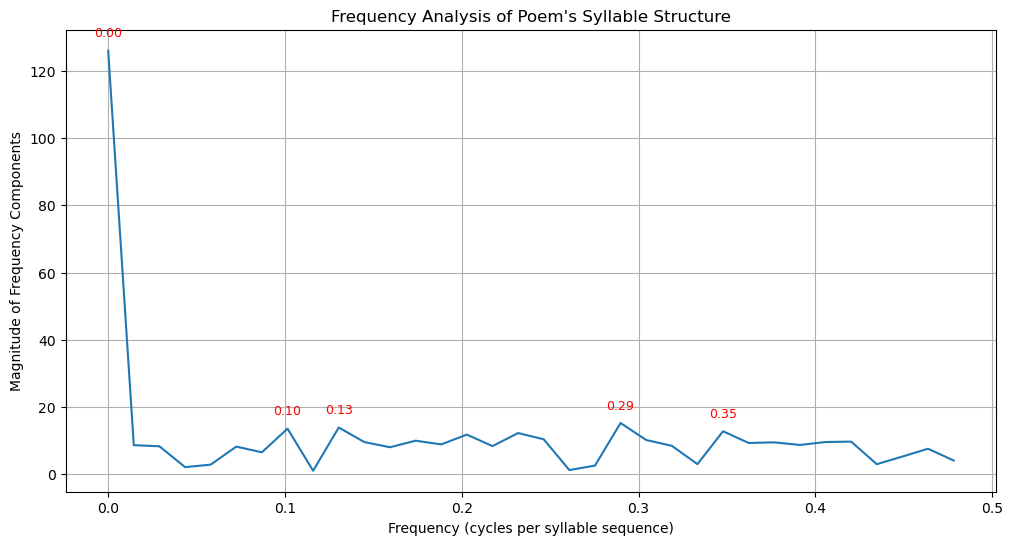

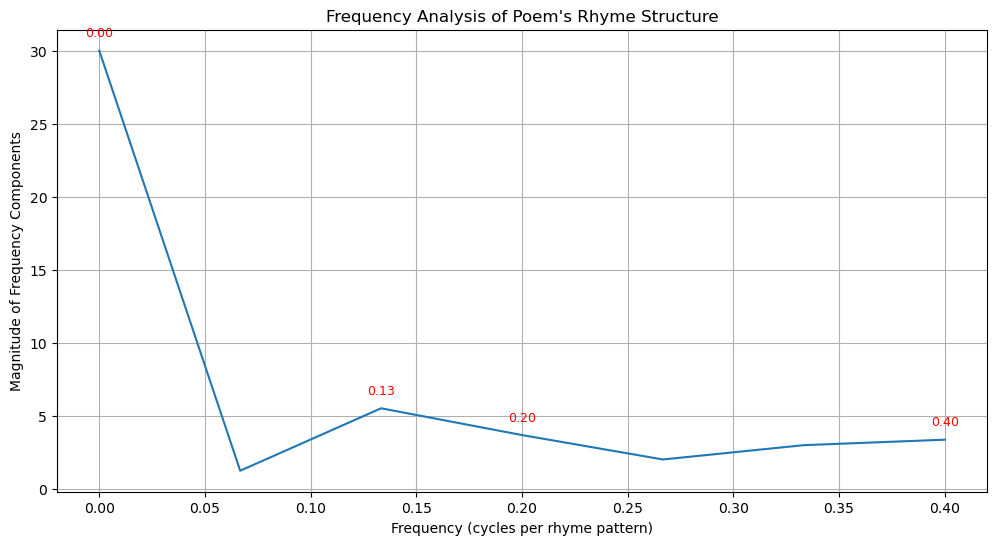

(array([0.        , 0.13333333, 0.2       , 0.4       ]),
 array([30.        ,  5.52368031,  3.69026205,  3.37371694]))

In [12]:
# Preprocess the poem
poem = poem1
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = [count_syllables(word) for word in words]
rhyme_pattern = encode_rhyme_pattern(poem)

# Apply DFT
sequence1 = np.array(syllable_sequence)
sequence2 = np.array(rhyme_pattern)
# Compute the FFT
fft_result1 = compute_fft(sequence1)
fft_result2 = compute_fft(sequence2)

# Prepare data for plotting
N1 = len(sequence1)
N2 = len(sequence2)
xf1 = np.fft.fftfreq(N1)[:N1//2]  # Frequency components
yf1 = np.abs(fft_result1)[:N1//2]  # Magnitude of the FFT result
xf2 = np.fft.fftfreq(N2)[:N2//2]  # Frequency components
yf2 = np.abs(fft_result2)[:N2//2]  # Magnitude of the FFT result

# Plot the Fourier Transform
plot_fourier_transform(xf1, yf1,title="Frequency Analysis of Poem's Syllable Structure",
    xlabel="Frequency (cycles per syllable sequence)",
    ylabel="Magnitude of Frequency Components")
plot_fourier_transform(xf2, yf2,   title="Frequency Analysis of Poem's Rhyme Structure",
    xlabel="Frequency (cycles per rhyme pattern)",
    ylabel="Magnitude of Frequency Components")



### Observations and Interpretation of FFT Plots

#### Syllable Structure

Based on the FFT plot of the poem's syllable structure:

- **X-axis (Frequency)**: This represents the frequency in cycles per syllable sequence, indicating how often a pattern repeats within the sequence of syllables in the poem.
- **Y-axis (Magnitude of Frequency Components)**: This shows the strength or magnitude of the frequency components. Higher peaks indicate more prominent frequencies in the poem’s syllable structure.

#### Key Observations:
1. **Peak at 0.10 cycles per syllable sequence**: This suggests a noticeable repeating pattern in the syllable structure that occurs approximately every 10 syllables.
2. **Peak at 0.13 cycles per syllable sequence**: Indicates another repeating pattern that occurs approximately every 13 syllables.
3. **Peak at 0.29 cycles per syllable sequence**: Suggests a repeating pattern that occurs every approximately 29 syllables.
4. **Peak at 0.35 cycles per syllable sequence**: Another repeating pattern that occurs every 35 syllables.

#### Interpretation:
- The presence of these peaks suggests structured repetition within the syllable structure. The specific frequencies where the peaks occur help identify the nature of the repetition, such as how often certain syllable patterns are used throughout the poem.
- The peaks at 0.10, 0.13, 0.29, and 0.35 cycles per syllable sequence indicate significant patterns of repetition, reflecting the poet's intentional use of rhythmic and metrical techniques to create a musical flow in the poem.

### Rhyme Structure

Based on the FFT plot of the poem's rhyme structure:

- **X-axis (Frequency)**: This represents the frequency in cycles per rhyme pattern, indicating how often a pattern repeats within the sequence of rhymes in the poem.
- **Y-axis (Magnitude of Frequency Components)**: This shows the strength or magnitude of the frequency components. Higher peaks indicate more prominent frequencies in the poem’s rhyme structure.

#### Key Observations:
1. **Peak at 0.13 cycles per rhyme pattern**: This suggests a noticeable repeating pattern in the rhyme scheme that occurs approximately every 13 rhyme units.
2. **Peak at 0.20 cycles per rhyme pattern**: Indicates another repeating pattern that occurs approximately every 20 rhyme units.
3. **Peak at 0.40 cycles per rhyme pattern**: Suggests a repeating pattern that occurs every approximately 40 rhyme units.

#### Interpretation:
- The presence of these peaks suggests structured repetition within the rhyme scheme. The specific frequencies where the peaks occur help identify the nature of the repetition, such as how often certain rhymes are used throughout the poem.
- The peaks at 0.13, 0.20, and 0.40 cycles per rhyme pattern indicate significant patterns of repetition, reflecting the poet's intentional use of rhymes to create rhythm and coherence in the poem.

### Summary

The analysis of both syllable structure and rhyme structure using FFT reveals that the poem exhibits significant patterns of repetition in both its syllable and rhyme schemes. These patterns are likely intentional and contribute to the poem’s rhythmic and musical qualities. By identifying the specific frequencies at which these patterns occur, we gain insights into the poet's technique and the structural elements that make the poem engaging and aesthetically pleasing.

## Recurrence Plot

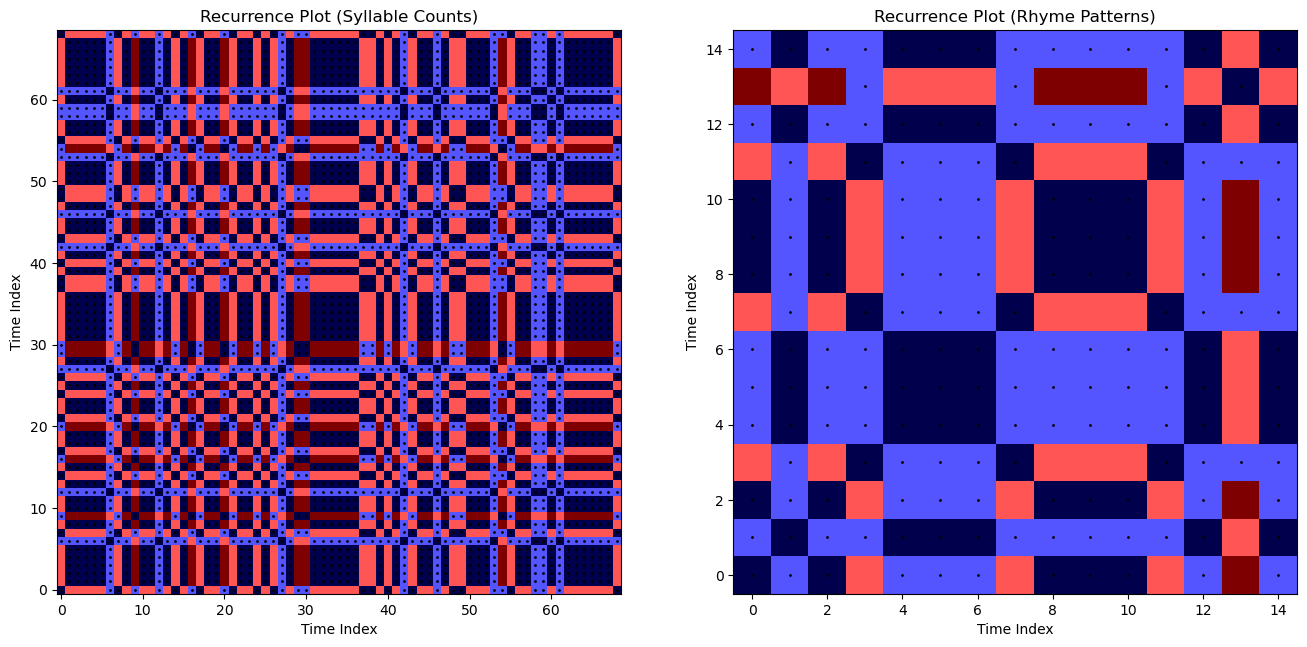

In [36]:
poem=poem1
words = re.findall(r'\b\w+\b', poem)
syllable_sequence = np.array([count_syllables(word) for word in words])

# Encode the rhyme pattern
rhyme_pattern = encode_rhyme_pattern(poem)

# Compute the recurrence matrix for syllable counts
N = len(syllable_sequence)
R_syllables = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        R_syllables[i, j] = np.abs(syllable_sequence[i] - syllable_sequence[j])

# Compute the recurrence matrix for rhyme patterns
N_rhyme = len(rhyme_pattern)
R_rhyme = np.zeros((N_rhyme, N_rhyme))
for i in range(N_rhyme):
    for j in range(N_rhyme):
        R_rhyme[i, j] = np.abs(rhyme_pattern[i] - rhyme_pattern[j])

# Define the threshold (epsilon)
epsilon = 1

# Apply the threshold to create binary recurrence matrices
binary_R_syllables = R_syllables <= epsilon
binary_R_rhyme = R_rhyme <= epsilon

# Ensure the main diagonal is set correctly
np.fill_diagonal(binary_R_syllables, 1)
np.fill_diagonal(binary_R_rhyme, 1)

# Plot the recurrence plots side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Recurrence plot for syllable counts
ax[0].imshow(R_syllables, origin='lower', cmap='seismic', interpolation='none')
ax[0].set_title('Recurrence Plot (Syllable Counts)')
ax[0].set_xlabel('Time Index')
ax[0].set_ylabel('Time Index')
ax[0].scatter(*np.where(binary_R_syllables), color='black', s=1)

# Recurrence plot for rhyme patterns
ax[1].imshow(R_rhyme, origin='lower', cmap='seismic', interpolation='none')
ax[1].set_title('Recurrence Plot (Rhyme Patterns)')
ax[1].set_xlabel('Time Index')
ax[1].set_ylabel('Time Index')
ax[1].scatter(*np.where(binary_R_rhyme), color='black', s=1)

plt.show()

### Recurrence Plot for Syllable Counts

#### Key Observations:
1. **Diagonal Patterns**: The main diagonal represents identical time indices. Any parallel diagonals indicate repeated patterns in the syllable structure.
2. **Cross-Hatch Patterns**: Cross-hatch patterns suggest periodic syllable structures, indicating recurring syllable patterns in the poem.
3. **Blocks of Color**: Blocks of similar colors indicate sections of consistent syllable structure, while variations in color indicate changes.

#### Interpretation:
- The recurring diagonal and cross-hatch patterns suggest a structured and rhythmic syllable pattern, indicating that the poem employs repeated syllable structures to create a rhythmic effect.

### Recurrence Plot for Rhyme Patterns

#### Key Observations:
1. **Diagonal Patterns**: The main diagonal represents identical time indices. Other parallel diagonals indicate repeated rhyme patterns.
2. **Blocks of Color**: Blocks of similar colors suggest sections of consistent rhyme patterns, while variations indicate changes in rhyme schemes.

#### Interpretation:
- The recurrence plot for rhyme patterns shows less dense but still significant patterns of repetition compared to syllable counts. The recurring diagonals indicate repeated rhymes, contributing to the poem's structure and rhythm.
- Distinct blocks of color suggest consistent rhyme schemes within certain sections, providing a rhythmic and musical quality to the poem.

### Summary

Both recurrence plots for syllable counts and rhyme patterns demonstrate significant self-similarity and structured repetition, reflecting the poet's deliberate use of rhythmic and metrical techniques. The observed structured repetition supports the hypothesis of fractal-like characteristics, with patterns repeating at different scales.

## Box-counting and Higuchi

                                Poem        Method  Dimension           Type
0             Атанас Далчев — Стаята       Higuchi   1.037630      Syllables
1             Атанас Далчев — Стаята       Higuchi   1.130705  Rhyme Pattern
2             Атанас Далчев — Стаята  Box-Counting   0.918077      Syllables
3             Атанас Далчев — Стаята  Box-Counting   0.896906  Rhyme Pattern
4   Пейо Яворов — Душата ми е пуста…       Higuchi   1.027211      Syllables
5   Пейо Яворов — Душата ми е пуста…       Higuchi   1.355999  Rhyme Pattern
6   Пейо Яворов — Душата ми е пуста…  Box-Counting   0.920728      Syllables
7   Пейо Яворов — Душата ми е пуста…  Box-Counting   0.895641  Rhyme Pattern
8             Никола Вапцаров — Вяра       Higuchi   1.074842      Syllables
9             Никола Вапцаров — Вяра       Higuchi   1.009354  Rhyme Pattern
10            Никола Вапцаров — Вяра  Box-Counting   0.921522      Syllables
11            Никола Вапцаров — Вяра  Box-Counting   0.918050  Rhyme Pattern

/var/folders/m4/_7k0lch175l8nhsjblq9r6lw0000gn/T/ipykernel_30701/3782269756.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"Poem": title, "Method": "Higuchi", "Dimension": hfd_syllables, "Type": "Syllables"}])], ignore_index=True)


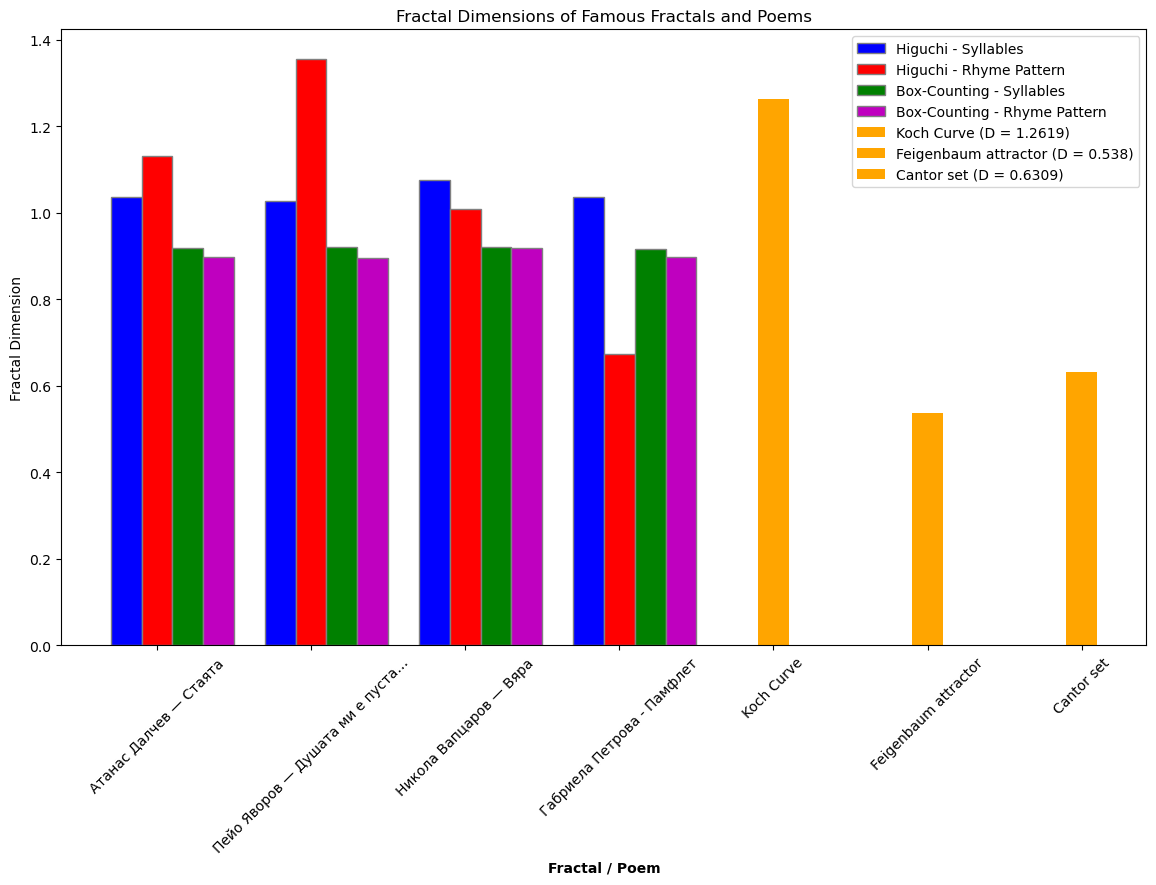

In [40]:

csv_path = '/Users/gabrielapetrova/Desktop/poems.csv'

# Read the poems from the CSV file
poems_df = pd.read_csv(csv_path, encoding='utf-8')

# DataFrame to store results
results = pd.DataFrame(columns=["Poem", "Method", "Dimension", "Type"])

# Famous fractals dimensions
famous_fractals = {
    "Koch Curve": 1.2619,
    "Feigenbaum attractor": 0.538,
    "Cantor set" : 0.6309
}

# Analyze each poem
for index, row in poems_df.iterrows():
    poem = row['Poem']
    title = row['Title']
    words = re.findall(r'\b\w+\b', poem)
    syllable_sequence = [count_syllables(word) for word in words]
    rhyme_pattern = encode_rhyme_pattern(poem)
   
    # Compute Higuchi's Fractal Dimension
    hfd_syllables = higuchi_fractal_dimension(syllable_sequence)
    hfd_rhyme = higuchi_fractal_dimension(rhyme_pattern)


    # Compute Box-Counting Fractal Dimension
    bcf_syllables = compute_box_counting_fractal_dimension(syllable_sequence)
    bcf_rhyme = compute_box_counting_fractal_dimension(rhyme_pattern)

    # Append results to DataFrame
    results = pd.concat([results, pd.DataFrame([{"Poem": title, "Method": "Higuchi", "Dimension": hfd_syllables, "Type": "Syllables"}])], ignore_index=True)
    results = pd.concat([results, pd.DataFrame([{"Poem": title, "Method": "Higuchi", "Dimension": hfd_rhyme, "Type": "Rhyme Pattern"}])], ignore_index=True)
    results = pd.concat([results, pd.DataFrame([{"Poem": title, "Method": "Box-Counting", "Dimension": bcf_syllables, "Type": "Syllables"}])], ignore_index=True)
    results = pd.concat([results, pd.DataFrame([{"Poem": title, "Method": "Box-Counting", "Dimension": bcf_rhyme, "Type": "Rhyme Pattern"}])], ignore_index=True)

print(results)

# Plot results for comparison
plt.figure(figsize=(14, 8))
bar_width = 0.2

# Set positions of the bars on the x-axis
r1 = np.arange(len(poems_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.bar(r1, results[(results["Method"] == "Higuchi") & (results["Type"] == "Syllables")]["Dimension"], color='b', width=bar_width, edgecolor='grey', label='Higuchi - Syllables')
plt.bar(r2, results[(results["Method"] == "Higuchi") & (results["Type"] == "Rhyme Pattern")]["Dimension"], color='r', width=bar_width, edgecolor='grey', label='Higuchi - Rhyme Pattern')
plt.bar(r3, results[(results["Method"] == "Box-Counting") & (results["Type"] == "Syllables")]["Dimension"], color='g', width=bar_width, edgecolor='grey', label='Box-Counting - Syllables')
plt.bar(r4, results[(results["Method"] == "Box-Counting") & (results["Type"] == "Rhyme Pattern")]["Dimension"], color='m', width=bar_width, edgecolor='grey', label='Box-Counting - Rhyme Pattern')

# Adding famous fractals
famous_fractals_keys = list(famous_fractals.keys())
r_famous = np.arange(len(famous_fractals)) + len(r4)+0.2
for i, fractal in enumerate(famous_fractals_keys):
    plt.bar(r_famous[i], famous_fractals[fractal], width=bar_width, label=f"{fractal} (D = {famous_fractals[fractal]})", color='orange')

# Adding labels
all_labels = poems_df['Title'].tolist() + famous_fractals_keys
plt.xlabel('Fractal / Poem', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(all_labels))], all_labels, rotation=45)
plt.ylabel('Fractal Dimension')
plt.title('Fractal Dimensions of Famous Fractals and Poems')
plt.legend()
plt.show()

In [41]:
# Data
data = {
    "Poem": [
        "Атанас Далчев — Стаята", "Атанас Далчев — Стаята", "Атанас Далчев — Стаята", "Атанас Далчев — Стаята",
        "Пейо Яворов — Душата ми е пуста…", "Пейо Яворов — Душата ми е пуста…", "Пейо Яворов — Душата ми е пуста…", "Пейо Яворов — Душата ми е пуста…",
        "Никола Вапцаров — Вяра", "Никола Вапцаров — Вяра", "Никола Вапцаров — Вяра", "Никола Вапцаров — Вяра",
        "Габриела Петрова - Памфлет", "Габриела Петрова - Памфлет", "Габриела Петрова - Памфлет", "Габриела Петрова - Памфлет"
    ],
    "Method": [
        "Higuchi", "Higuchi", "Box-Counting", "Box-Counting",
        "Higuchi", "Higuchi", "Box-Counting", "Box-Counting",
        "Higuchi", "Higuchi", "Box-Counting", "Box-Counting",
        "Higuchi", "Higuchi", "Box-Counting", "Box-Counting"
    ],
    "Dimension": [
        1.037630, 1.130705, 0.918077, 0.896906,
        1.027211, 1.355999, 0.920728, 0.895641,
        1.074842, 1.009354, 0.921522, 0.918050,
        1.036714, 0.672663, 0.916941, 0.896974
    ],
    "Type": [
        "Syllables", "Rhyme Pattern", "Syllables", "Rhyme Pattern",
        "Syllables", "Rhyme Pattern", "Syllables", "Rhyme Pattern",
        "Syllables", "Rhyme Pattern", "Syllables", "Rhyme Pattern",
        "Syllables", "Rhyme Pattern", "Syllables", "Rhyme Pattern"
    ]
}


# Create DataFrame
df = pd.DataFrame(data)

# Famous fractals dimensions
famous_fractals = {
    
    "Koch Curve": 1.2619,
    "Feigenbaum attractor": 0.538,
    "Cantor set" : 0.6309
}

# Prepare the data for ANOVA
poem_syllables = df[(df['Type'] == 'Syllables') & (df['Method'] == 'Higuchi')]['Dimension'].values
poem_rhymes = df[(df['Type'] == 'Rhyme Pattern') & (df['Method'] == 'Higuchi')]['Dimension'].values

famous_fractals_values = list(famous_fractals.values())

# Combine all groups into a list
groups = [poem_syllables, poem_rhymes, famous_fractals_values]

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

F-statistic: 0.8519783831453296
P-value: 0.46191762769788697
There is no significant difference between the groups.


### Conclusion from ANOVA Analysis

Based on the ANOVA analysis conducted to compare the fractal dimensions of the poems and famous fractals, we obtained the following results:

- **F-statistic**: 0.85
- **P-value**: 0.46

The obtained p-value exceeds the common significance level of 0.05. Thus, we fail to reject the null hypothesis (H0), indicating no significant difference between the group means. Consequently, we do not have sufficient evidence to suggest that there is a significant difference in fractal dimensions between the poems and the famous fractals.

### Interpretation

The non-significant difference observed through the ANOVA analysis implies that the fractal dimensions calculated for the syllable counts and rhyme patterns of the poems are comparable to those of famous mathematical fractals such as the Sierpinski Triangle, Cantor Set, and Feigenbaum attractor. This suggests that the poems may exhibit fractal-like characteristics similar to these well-known fractals.

### Summary

- The ANOVA analysis did not find a significant difference in the fractal dimensions between the poems and famous fractals.
- This suggests that the poems may share similar fractal properties with the famous fractals analyzed in this study.

These findings imply that the poems might demonstrate some degree of repetitive or self-similar patterns akin to classical fractals, although further analysis may be needed to ascertain the extent of this similarity.


# Final Review

## Summary of Findings
The primary objective of this project was to investigate whether poems exhibit fractal-like structures by analyzing syllable counts using various mathematical methods. The methods employed included syllable counting, rhyme pattern establishing, Fast Fourier Transform (FFT), Recurrence Plots, Higuchi's Fractal Dimension (HFD), and the Box-Counting method. The analysis revealed recurrences and dimensions ranging from 0.672663, to 1.355999.

## Implications of Findings
These findings contribute to a deeper understanding of the structural complexity of poems. Identifying fractal-like structures provides new insights into the rhythmic and thematic patterns present in poetry, which can enhance literary analysis. This study highlights the intricate and self-similar nature of poetic forms, suggesting that the principles of fractal geometry can be applied to the analysis of literary texts.

## Limitations
The analysis was limited by the sample size and the specific selection of poems analyzed and fractals used for comparison. Methodological limitations include potential biases in syllable counting and the assumptions made during fractal dimension calculations. Future studies should address these limitations by expanding the dataset and employing more sophisticated methods.

## Future Research Directions
Future research should aim to expand the analysis by incorporating a larger and more diverse set of poems, including works from different eras, schools of poetry, types of poetry. This can help in understanding how fractal-like structures might vary across literary traditions. Additionally, it would be beneficial to include other forms of literature, such as prose, drama, and spoken word, to investigate whether similar fractal patterns are present.

Improving the accuracy of syllable counting algorithms is crucial. Employing natural language processing (NLP) techniques and machine learning models specifically trained on diverse poetic datasets can enhance the precision of syllable counts, especially for complex and irregular poetic forms. Exploring alternative mathematical techniques for fractal analysis, such as wavelet transforms or multifractal analysis, could provide deeper insights into the structural complexity of poems.

A multidisciplinary approach that combines literary analysis with mathematical modeling, computer science, and linguistics is essential. Collaborations with experts in these fields can lead to the development of new analytical tools and methods that are more robust and comprehensive. For instance, integrating semantic analysis with fractal analysis could uncover correlations between thematic elements and structural patterns in poetry.

## Conclusion
Reflecting on this project, the journey has revealed unexpected insights into the fractal nature of poetry. The findings suggest that the rhythmic and thematic patterns in poems exhibit self-similarity and complexity akin to natural fractals.


## References
<a name="cite_note-1"></a>1. [^](#cite_ref-1) https://www.sfu.ca/~rpyke/335/W00/21jan.html#:~:text=We%20say%20that%20fractals%20have,for%20the%20fractal%2Dlike%20objects.

<a name="cite_note-2"></a>2. [^](#cite_ref-2) https://www.examples.com/english/elements-of-poetry.html

<a name="cite_note-3"></a>3. [^](#cite_ref-3) http://ram-verlag.eu/wp-content/uploads/2018/08/g21zeit.pdf#page=77

<a name="cite_note-4"></a>4. [^](#cite_ref-4)rythm info https://www.bbc.co.uk/bitesize/articles/zmpxbdm#zmd2qfr

https://www.studysmarter.co.uk/explanations/english/morphology/recursion/#:~:text=Recursion%20is%20a%20mathematical%20phenomenon,within%20itself%20again%20and%20again.

https://www.bbc.co.uk/bitesize/articles/zmpxbdm#zmd2qfr

<a name="cite_note-5"></a>5. [^](#cite_ref-5) https://stackoverflow.com/questions/46759492/syllable-count-in-python

<a name="cite_note-6"></a>6. [^](#cite_ref-6) https://github.com/hyperreality/Poetry-Tools usage of specific algorithm inspired by this

<a name="cite_note-7"></a>7. [^](#cite_ref-7) Plamondon, M. R. (2009). Poetic Waveforms, Discrete Fourier Transform Analysis of Phonemic Accumulations, and Love in the Garden of Tennyson’s Maud. Digital Studies/le Champ Numérique, 1(3). DOI: http://doi.org/10.16995/dscn.99
 
<a name="cite_note-8"></a>8. [^](#cite_ref-8) https://docs.scipy.org/doc/scipy/tutorial/fft.html

<a name="cite_note-9"></a>9. [^](#cite_ref-9)https://www.researchgate.net/publication/228857014_Fractal_Analysis_of_Duration_Pattern_in_Poetry

<a name="cite_note-10"></a>10. [^](#cite_ref-10) https://medium.com/@samuelerickson977/characterizing-time-series-with-recurrence-plots-34888b1261a0

<a name="cite_note-11"></a>11. [^](#cite_ref-11)https://en.wikipedia.org/wiki/Higuchi_dimension

<a name="cite_note-11.1"></a>11.1 [^](#cite_ref-11.1)https://stackoverflow.com/questions/47259866/fractal-dimension-algorithms-gives-results-of-2-for-time-series


<a name="cite_note-12"></a>12. [^](#cite_ref-12)https://en.wikipedia.org/wiki/List_of_fractals_by_Hausdorff_dimension



